# Carga del dataset
Gracias a las utiliades de keras se pueden cargar las imágenes del dataset de una forma muy eficiente, haciendo uso de la clase ImageDataGenerator. Esta utilidad carga las imágenes a medida que se necesitan, como cualquier otro generador en Python, ahorrando el uso de memoria necesaria para el entrenamiento. Además, inlcuye opciones para aplicar Data Augmentation durante la carga. Al tratarse de un generador sobre el que se va a iterar no se puede saber el tamaño de los datos que contiene, por lo que ese valor se ha introducido a mano en esta celda también.

In [1]:
from keras.preprocessing.image import ImageDataGenerator

base_path = 'F:\\master\\vision\\pr_learning\\dataset'
data_entrenamiento = f'{base_path}\\train\\'
data_validacion = f'{base_path}\\validation\\'
data_test = f'{base_path}\\test\\'

training_imgs = 35444
val_imgs = 2614
test_imgs = 1204

entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

Con el método flow_from_directory, el generador escanea un directorio del equipo en busca de imágenes para cargar. La colocación de las imágenes en los árboles del directorio es muy importante para hacer uso de esta utilidad. En nuestro caso hay 3 directorios principales --train, validation y test--, con las imágenes que se emplearán en cada una de las fases del entrenamiento. Esos 3 directorios son los que se introducirán en el método flow_from_directory, utilizando cada uno de ellos un generador distinto. Los 3 directorios principales que acabamos de señalar comparten la misma estructura interna, ya que tienen en su interior 43 directorios --en el dataset hay 43 clases, un directorio por cada clase del clasificador--, y dentro de cada carpeta las imágenes correspondientes a la misma clase.

In [2]:
batch_size_ff = 128

entrenamiento_generador_ff = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

validacion_generador_ff = val_datagen.flow_from_directory(
    data_validacion,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

test_generador_ff = test_datagen.flow_from_directory(
    data_test,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

Found 35444 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.
Found 1204 images belonging to 43 classes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# Creación de modelos
## ffNN
Para la primera parte del ejercicio, se crearon 3 modelos distintos con el objetivo de poder compararlos. Estas funciones, que se emplearán más adelante, crean los modelos para ser utilizados.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

def build_model_v1():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(.3))
    model.add(Activation('relu'))   
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

### Modelo 1

In [5]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                5547      
_________________________________________________________________
activation_2 (Activation)    (None, 43)                0

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
276/276 [==============================] - 664s 2s/step - loss: 2.4881 - accuracy: 0.3556 - val_loss: 1.6437 - val_accuracy: 0.5508
Epoch 2/30
276/276 [==============================] - 23s 83ms/step - loss: 1.4382 - accuracy: 0.5994 - val_loss: 1.1784 - val_accuracy: 0.6781
Epoch 3/30
276/276 [==============================] - 23s 83ms/step - loss: 1.0977 - accuracy: 0.6888 - val_loss: 0.9306 - val_accuracy: 0.7336
Epoch 4/30
276/276 [==============================] - 23s 83ms/step - loss: 0.9461 - accuracy: 0.7252 - val_loss: 0.9204 - val_accuracy: 0.7121
Epoch 5/30
276/276 [==============================] - 23s 83ms/step - loss: 0.8550 - accuracy: 0.7547 - val_loss: 0.7412 - val_accuracy: 0.7918
Epoch 6/30
276/276 [==============================] - 23s 83ms/step - loss: 0.7958 - accuracy: 0.7712 - val_loss: 0.7136 - val_accuracy: 0.8012
Epoch 7/30
276/276 [==============================] - 23s 84m

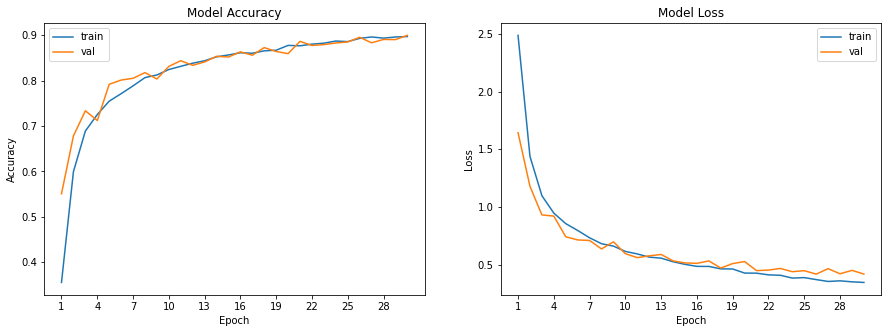

Training MLP took 1356.2527375221252 seconds


In [6]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Modelo 2

In [7]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

Epoch 1/30
276/276 [==============================] - 24s 86ms/step - loss: 3.4786 - accuracy: 0.0860 - val_loss: 2.9748 - val_accuracy: 0.2367
Epoch 2/30
276/276 [==============================] - 23s 84ms/step - loss: 2.8325 - accuracy: 0.2000 - val_loss: 2.3139 - val_accuracy: 0.3375
Epoch 3/30
276/276 [==============================] - 24s 86ms/step - loss: 2.4101 - accuracy: 0.2811 - val_loss: 1.9601 - val_accuracy: 0.3797
Epoch 4/30
276/276 [==============================] - 25s 92ms/step - loss: 2.1647 - accuracy: 0.3314 - val_loss: 1.8362 - val_accuracy: 0.4129
Epoch 5/30
276/276 [==============================] - 24s 86ms/step - loss: 2.0572 - accuracy: 0.3508 - val_loss: 1.7443 - val_accuracy: 0.4098
Epoch 6/30
276/276 [==============================] - 25s 89ms/step - loss: 1.9964 - accuracy: 0.3644 - val_loss: 1.6829 - val_accuracy: 0.4359
Epoch 7/30
276/276 [==============================] - 23s 85ms/step - loss: 1.9154 - accuracy: 0.3865 - val_loss: 1.6344 - val_accuracy:

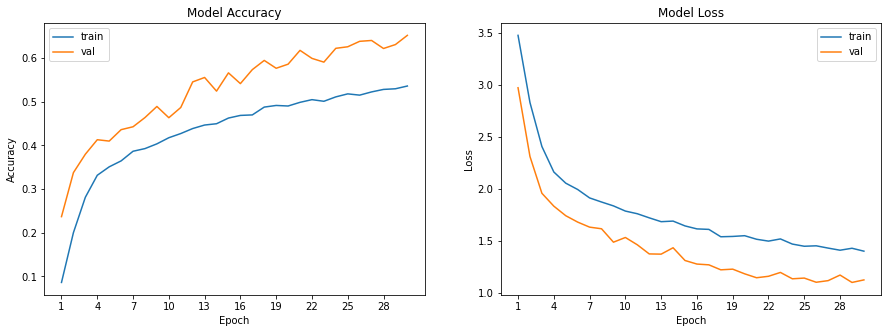

Training MLP took 711.3586809635162 seconds


In [8]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Modelo 3

In [9]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
activation_8 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_9 (Activation)    (None, 512)              

Epoch 1/30
276/276 [==============================] - 25s 90ms/step - loss: 3.4589 - accuracy: 0.0808 - val_loss: 2.9472 - val_accuracy: 0.2012
Epoch 2/30
276/276 [==============================] - 25s 89ms/step - loss: 2.8065 - accuracy: 0.1920 - val_loss: 2.3080 - val_accuracy: 0.3309
Epoch 3/30
276/276 [==============================] - 25s 90ms/step - loss: 2.3985 - accuracy: 0.2740 - val_loss: 1.9440 - val_accuracy: 0.3820
Epoch 4/30
276/276 [==============================] - 25s 90ms/step - loss: 2.2125 - accuracy: 0.3129 - val_loss: 1.8606 - val_accuracy: 0.4082
Epoch 5/30
276/276 [==============================] - 25s 89ms/step - loss: 2.0930 - accuracy: 0.3413 - val_loss: 1.6779 - val_accuracy: 0.4430
Epoch 6/30
276/276 [==============================] - 25s 90ms/step - loss: 1.9772 - accuracy: 0.3703 - val_loss: 1.5838 - val_accuracy: 0.4742
Epoch 7/30
276/276 [==============================] - 25s 90ms/step - loss: 1.8898 - accuracy: 0.3949 - val_loss: 1.4851 - val_accuracy:

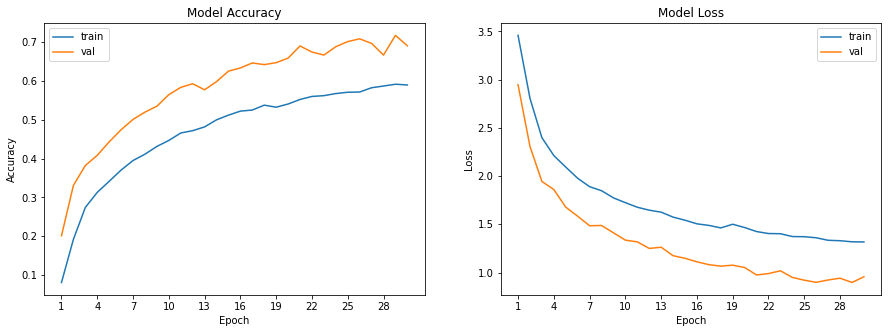

Training MLP took 755.6895115375519 seconds


In [10]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

## Red convolucional

In [11]:
batch_size_cnn = 512

entrenamiento_generador_cnn = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(32, 32),
    batch_size=batch_size_cnn,
    class_mode='categorical')

validacion_generador_cnn = val_datagen.flow_from_directory(
    data_validacion,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

test_generador_cnn = test_datagen.flow_from_directory(
    data_test,
    target_size=(32, 32),
    batch_size=batch_size_cnn,
    class_mode='categorical')

Found 35444 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.
Found 1204 images belonging to 43 classes.


Al igual que se hizo con las ffNN, antes de experimetar, se define una función que crea el modelo convolucional.

In [12]:
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input, Dropout, Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
    return x

def build_conv(include_dropout = True): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if include_dropout:
        x = Dropout(0.2)(x)

    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if include_dropout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if include_dropout:
        x = Dropout(0.3)(block3)

    x = Flatten()(x)
    output = Dense(43, activation='softmax')(x)
    return Model(net_input, output)


Una vez definida la función, se crea y experimenta con ella

In [13]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)       

Epoch 1/10
69/69 [==============================] - 60s 866ms/step - loss: 2.7767 - accuracy: 0.2382 - val_loss: 1.6195 - val_accuracy: 0.4797
Epoch 2/10
69/69 [==============================] - 56s 814ms/step - loss: 1.1731 - accuracy: 0.6141 - val_loss: 0.7172 - val_accuracy: 0.7766
Epoch 3/10
69/69 [==============================] - 59s 854ms/step - loss: 0.6797 - accuracy: 0.7726 - val_loss: 0.3657 - val_accuracy: 0.8922
Epoch 4/10
69/69 [==============================] - 59s 858ms/step - loss: 0.4523 - accuracy: 0.8500 - val_loss: 0.2968 - val_accuracy: 0.9219
Epoch 5/10
69/69 [==============================] - 58s 845ms/step - loss: 0.3380 - accuracy: 0.8872 - val_loss: 0.1758 - val_accuracy: 0.9500
Epoch 6/10
69/69 [==============================] - 59s 848ms/step - loss: 0.2675 - accuracy: 0.9100 - val_loss: 0.1925 - val_accuracy: 0.9500
Epoch 7/10
69/69 [==============================] - 59s 848ms/step - loss: 0.2155 - accuracy: 0.9286 - val_loss: 0.1484 - val_accuracy: 0.9609

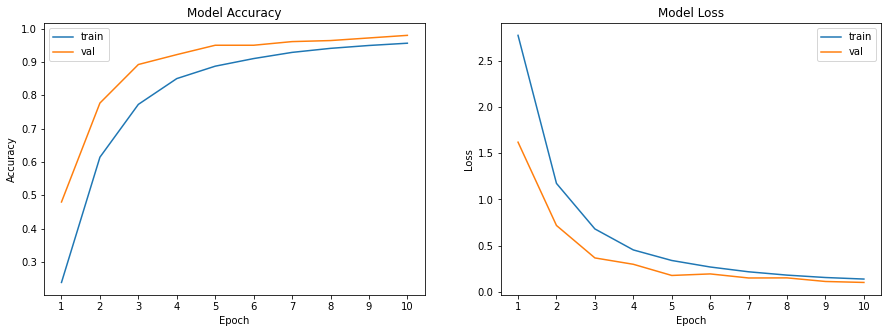

Training MLP took 599.2903389930725 seconds


In [14]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_cnn, steps_per_epoch=training_imgs//batch_size_cnn, epochs=10, verbose=1, validation_data=validacion_generador_cnn, validation_steps=val_imgs//batch_size_cnn)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_cnn, test_imgs//batch_size_cnn if test_imgs//batch_size_cnn > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")